# Initializing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Replace the path the actual folder name
os.chdir("/content/drive/MyDrive/QBIO 401/QBIO 401 Project/Data")

# Confirm that the files are accessible
os.listdir()

['switzerland.data',
 'cleveland.data',
 'processed.va.data',
 'reprocessed.hungarian.data',
 'new.data',
 'processed.hungarian.data',
 'hungarian.data',
 'long-beach-va.data',
 'processed.cleveland.data',
 'processed.switzerland.data']

In [3]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data Exploration (removing nulls) (option 1)

In [4]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_hung = pd.read_csv('processed.hungarian.data', names=column_names, na_values="?")
print(df_hung.shape)
print(df_hung.isnull().sum())
df_hung.head()

(294, 14)
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [5]:
df_hung.dropna(inplace=True)
df_hung.shape

(1, 14)

In [6]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_va = pd.read_csv('processed.va.data', names=column_names, na_values="?")
print(df_va.shape)
print(df_va.isnull().sum())
df_va.head()

(200, 14)
age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [7]:
df_va.dropna(inplace=True)
df_va.shape

(1, 14)

In [8]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_clv = pd.read_csv('processed.cleveland.data', names=column_names, na_values="?")
print(df_clv.shape)
print(df_clv.isnull().sum())
df_clv.head()

(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
df_clv.dropna(inplace=True)
df_clv.shape

(297, 14)

In [10]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_sws = pd.read_csv('processed.switzerland.data', names=column_names, na_values="?")
print(df_sws.shape)
print(df_sws.isnull().sum())
df_sws.head()

(123, 14)
age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [11]:
df_sws.dropna(inplace=True)
df_sws.shape

(0, 14)

In [12]:
df = pd.concat([df_va, df_hung, df_clv, df_sws], ignore_index=True)
df.shape


(299, 14)

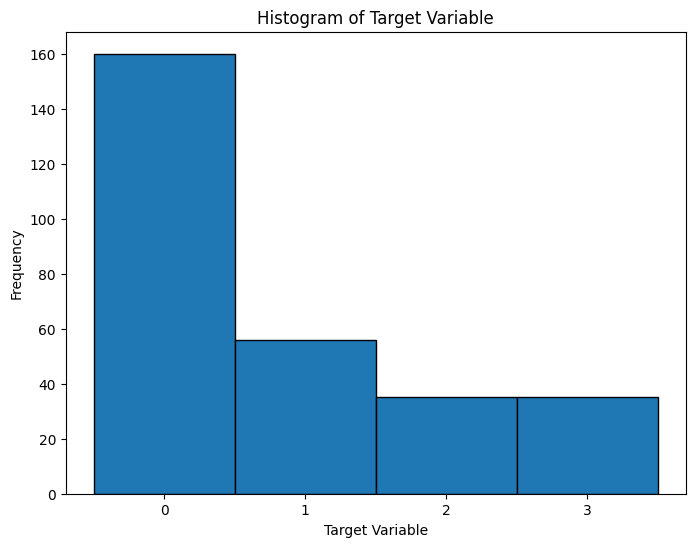

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['target'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor='black')
plt.xticks([0, 1, 2, 3])
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()

In [14]:
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

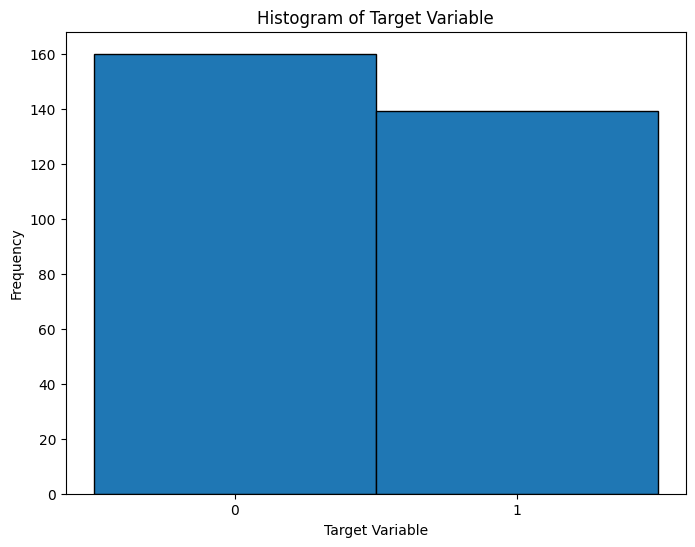

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['target'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()

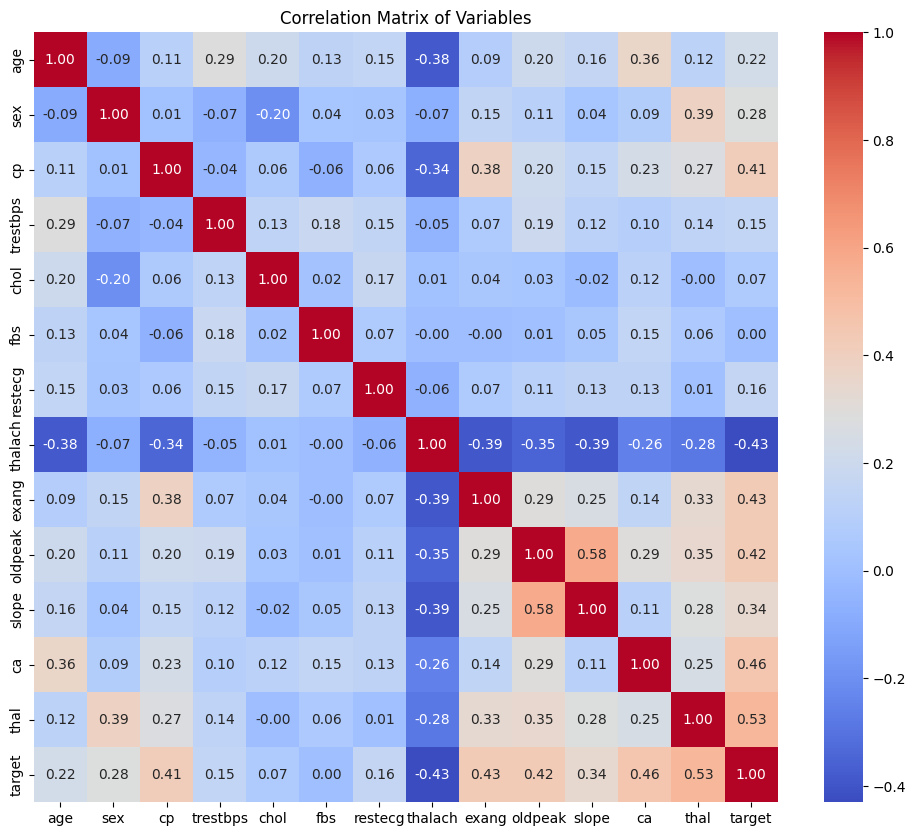

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


# Data Exploration (filling in nulls) (option 2)

In [ ]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_hung = pd.read_csv('processed.hungarian.data', names=column_names, na_values="?")
print(df_hung.shape)
print(df_hung.isnull().sum())
df_hung.head()

(294, 14)
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [ ]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_va = pd.read_csv('processed.va.data', names=column_names, na_values="?")
print(df_va.shape)
print(df_va.isnull().sum())
df_va.head()

(200, 14)
age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [ ]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_clv = pd.read_csv('processed.cleveland.data', names=column_names, na_values="?")
print(df_clv.shape)
print(df_clv.isnull().sum())
df_clv.head()

(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df_sws = pd.read_csv('processed.switzerland.data', names=column_names, na_values="?")
print(df_sws.shape)
print(df_sws.isnull().sum())
df_sws.head()

(123, 14)
age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [ ]:
df = pd.concat([df_va, df_hung, df_clv, df_sws], ignore_index=True)
print(df.shape)
df.isnull().sum()

(920, 14)


,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalach,55
exang,55
oldpeak,62


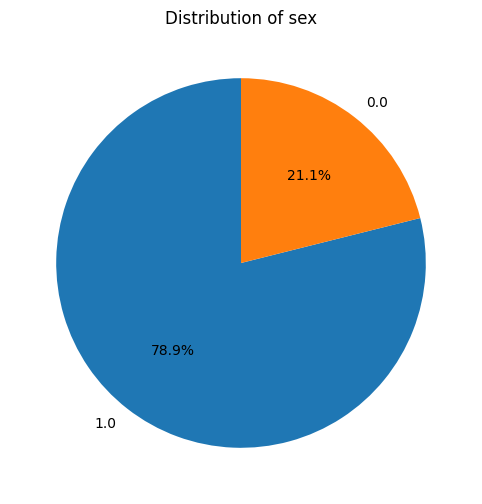

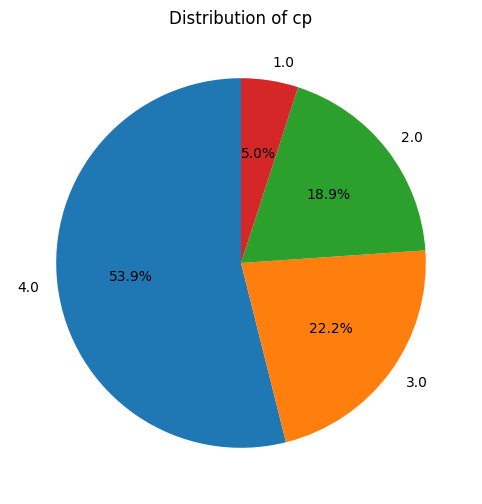

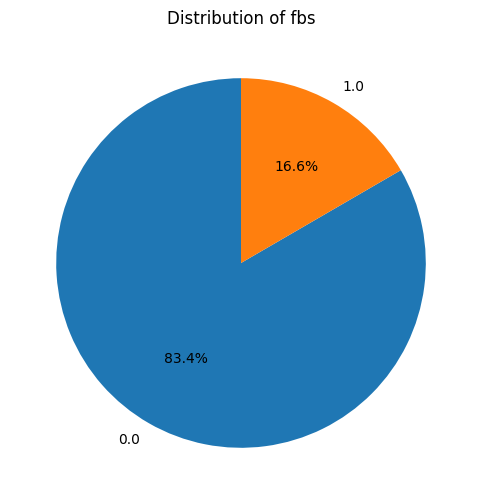

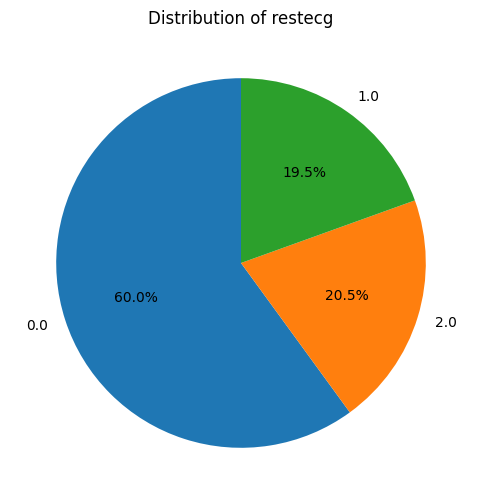

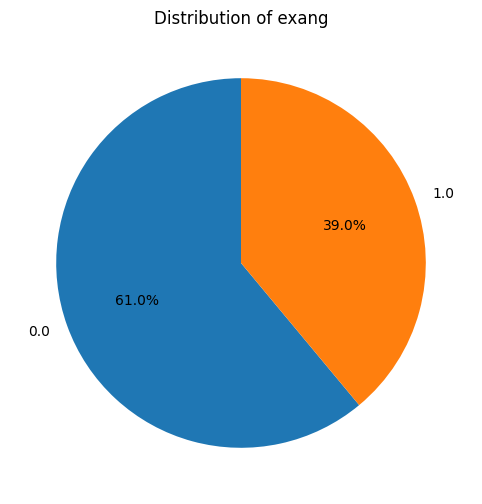

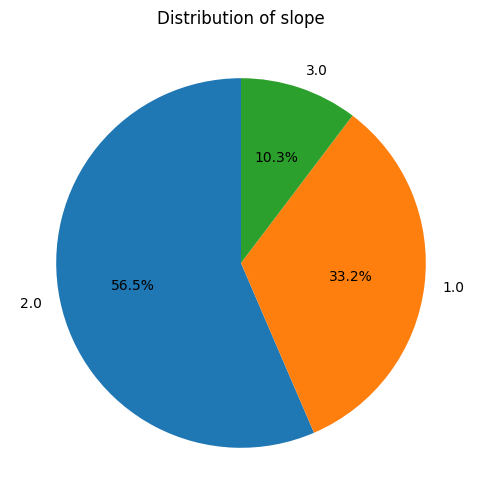

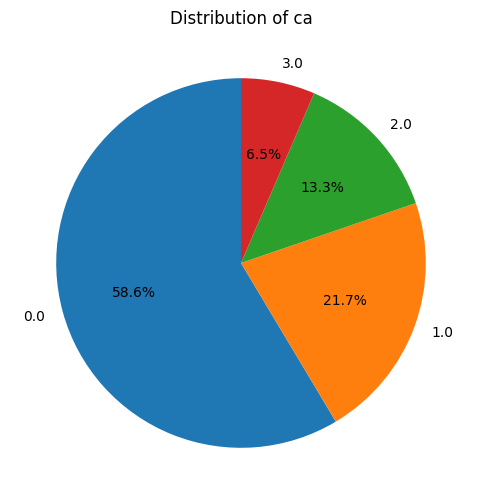

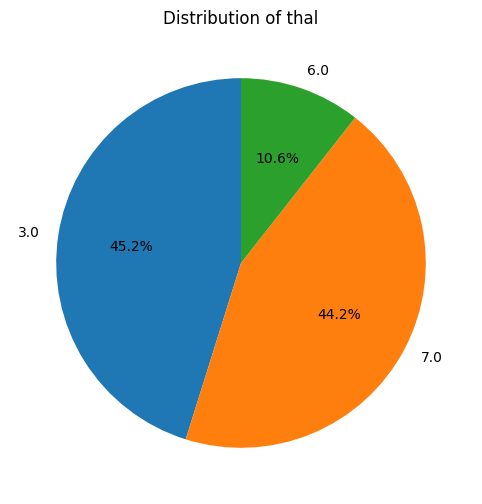

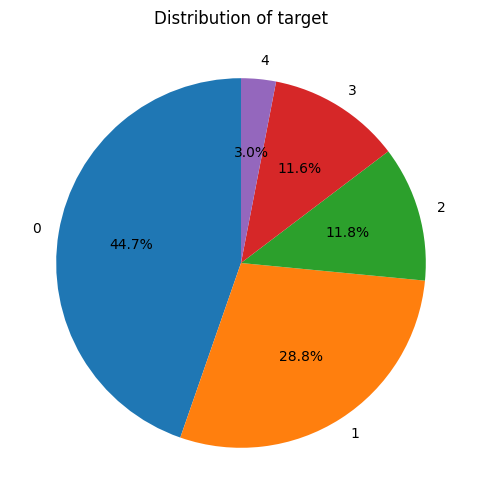

In [ ]:
# prompt: show pie charts for the distrbution of each variable

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame (as defined in your previous code)

# Iterate through each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object' or df[column].nunique() <= 10: #check for categorical variables and variables with less than 10 unique values
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)  # Create pie chart
        plt.title(f'Distribution of {column}')  # Set title
        plt.ylabel('') # remove y axis label
        plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [ ]:
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
# Define categorical columns (excluding the target variable)
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

# Fill null values in categorical columns with "Unknown"
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")


In [ ]:
# prompt: for all the categorical variables, give a new class when label is "Unknown"

# Create a new class for "Unknown" in categorical columns
for col in categorical_cols:
    if "Unknown" in df[col].unique():
        df.loc[df[col] == "Unknown", col] = df[col].nunique() +1


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,0.676375,5,1
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,5,0.676375,5,0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,0.676375,5,1
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,0.676375,5,1
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.676375,5,0


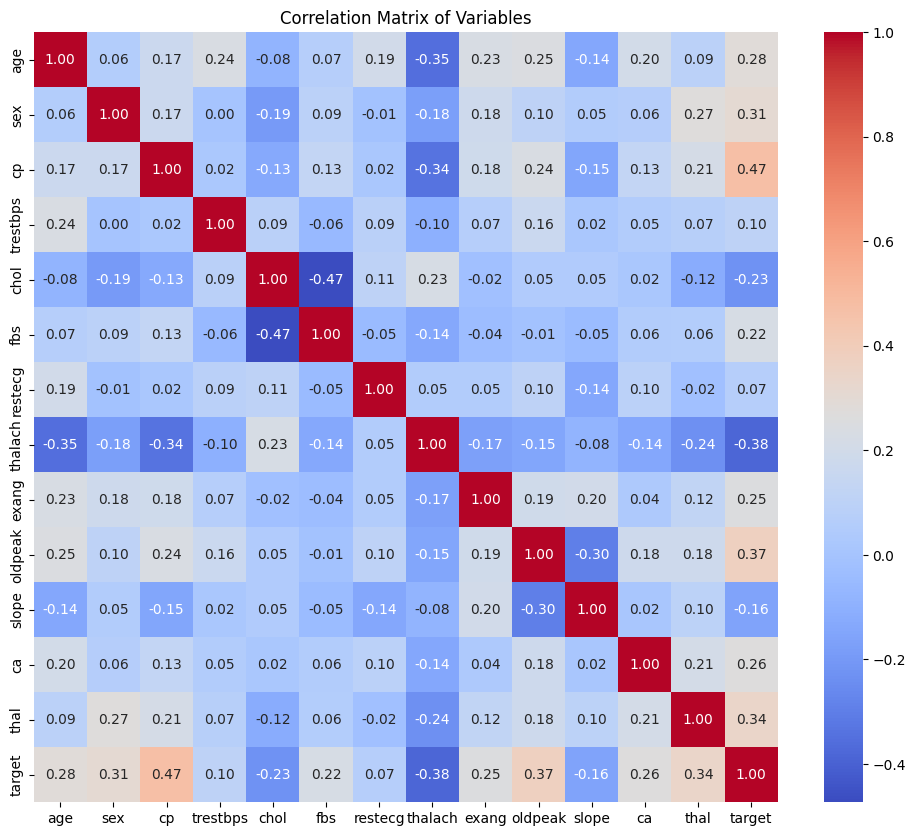

In [ ]:
# prompt: show correlation matrix (heatmap)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (as defined in your previous code)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


In [ ]:
# prompt: convert all columns to float

# Convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate value)
df.fillna(0, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  ca        920 non-null    float64
 12  thal      920 non-null    int64  
 13  target    920 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 100.8 KB


# Model Construction

In [101]:
df_train, df_test = train_test_split(df, train_size=0.6, random_state = 101, stratify=df["target"])

In [102]:
print("Training set proportion:")
print(df_train["target"].value_counts(normalize=True))

print("\nTest set proportion:")
print(df_test["target"].value_counts(normalize=True))

Training set proportion:
target
0    0.536313
1    0.463687
Name: proportion, dtype: float64

Test set proportion:
target
0    0.533333
1    0.466667
Name: proportion, dtype: float64


In [103]:
from sklearn.preprocessing import MinMaxScaler

target_variable = 'target'
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Identify numeric columns (excluding the target variable)
numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove(target_variable)  # Exclude target variable

# Fit and transform training data
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

# Transform test data using the same scaler
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [104]:
df_train.describe().loc[['mean', 'std', 'min', 'max']].T

,mean,std,min,max
age,0.516061,0.217147,0.0,1.0
sex,0.692737,0.462653,0.0,1.0
cp,0.702048,0.322853,0.0,1.0
trestbps,0.360915,0.173853,0.0,1.0
chol,0.315642,0.118036,0.0,1.0
fbs,0.145251,0.353342,0.0,1.0
restecg,0.544693,0.497987,0.0,1.0
thalach,0.570950,0.215007,0.0,1.0
exang,0.329609,0.471390,0.0,1.0
oldpeak,0.165435,0.183638,0.0,1.0


## Helper Functions

In [105]:
import itertools
import patsy

def generate_interaction_formula(df, target, max_interaction_order=2):
    """
    Generate a Patsy-style formula with all interactions up to a specified order,
    excluding the target variable.

    Parameters:
        df (pd.DataFrame): DataFrame containing predictor variables.
        target (str): The name of the target variable (to exclude from predictors).
        max_interaction_order (int): Maximum order of interactions (default = 2 for pairwise).

    Returns:
        str: A Patsy-style formula string with main effects and interactions.
    """
    # Exclude the target variable
    predictors = [col for col in df.columns if col != target]

    # If only main effects (order=1), return them directly
    if max_interaction_order == 1:
        return " + ".join(predictors)

    # Generate main effects
    main_effects = " + ".join(predictors)

    # Generate interaction terms up to the specified order
    interactions = []
    for order in range(2, max_interaction_order + 1):  # Start from 2 (pairwise) to max order
        interactions.extend(
            [":".join(combo) for combo in itertools.combinations(predictors, order)]
        )

    # Combine main effects and interactions
    formula = f"{main_effects} + {' + '.join(interactions) if interactions else ''}"

    return formula

In [106]:
def forward_stepwise_regression(y, X, start_cols=[]):
  # Available predictors
  remaining_cols = list(X.columns)

  # Initialize with start columns
  selected_cols = list(start_cols)

  # Ensure start columns are valid
  for col in start_cols:
    if col in remaining_cols:
                remaining_cols.remove(col)

  best_criterion_value = float("inf")
  best_model = None

  while remaining_cols:
    best_candidate = None

    for col in remaining_cols:
      # Try adding this column to the model
      trial_cols = selected_cols + [col]
      # Ensure intercept is added inside the model
      X_trial = sm.add_constant(X[trial_cols])
      model = sm.Logit(y, X_trial).fit(disp=0, method = "ncg")

      # Evaluate model BIC
      crit_value = model.bic

      # Keep track of the best addition
      if crit_value < best_criterion_value:
        best_criterion_value = crit_value
        best_candidate = col
        best_model = model

    # If no improvement, break
    if best_candidate is None:
      break

    # Add the best candidate to selected features
    selected_cols.append(best_candidate)
    remaining_cols.remove(best_candidate)

  return best_model, selected_cols

In [107]:
def forward_stepwise_regression(model_fn, y, X, criterion="bic", start_cols=[]):
    """
    Perform forward stepwise selection for OLS or Logistic Regression.

    Parameters:
        model_fn (function): statsmodels.api.OLS or statsmodels.api.Logit
        y (array-like): Response variable
        X (pd.DataFrame): Predictor variables (intercept should already be included)
        criterion (str): "bic" (default) or "aic" for model selection
        start_cols (list): Columns to start with (default is an empty list)

    Returns:
        fitted_model: Final statsmodels fitted model.
        selected_columns (list): List of selected feature names.
    """

    # Available predictors
    remaining_cols = list(X.columns)

    # Initialize with start columns
    selected_cols = list(start_cols)

    # Ensure start columns are valid
    for col in start_cols:
        if col in remaining_cols:
            remaining_cols.remove(col)

    best_criterion_value = float("inf")
    best_model = None

    while remaining_cols:
        best_candidate = None

        for col in remaining_cols:
            # Try adding this column to the model
            trial_cols = selected_cols + [col]

            # Ensure intercept is added inside the model
            X_trial = sm.add_constant(X[trial_cols])

            model = model_fn(y, X_trial).fit(disp=0)

            # Evaluate model using AIC or BIC
            crit_value = model.bic if criterion == "bic" else model.aic

            # Keep track of the best addition
            if crit_value < best_criterion_value:
                best_criterion_value = crit_value
                best_candidate = col
                best_model = model

        # If no improvement, break
        if best_candidate is None:
            break

        # Add the best candidate to selected features
        selected_cols.append(best_candidate)
        remaining_cols.remove(best_candidate)

    return best_model, selected_cols

In [108]:
def get_confusion_matrix(y_true, phat, thr=0.5):
    """
    Computes and returns a labeled confusion matrix based on true labels,
    estimated probabilities, and a specified threshold.

    Parameters:
    -----------
    y_true : array-like
        The true binary labels (0 or 1) of the dataset.

    phat : array-like
        The predicted probabilities for the positive class (1).
        Values should be between 0 and 1.

    thr : float, optional (default=0.5)
        The threshold used to convert predicted probabilities into class labels.
        If phat >= thr, the prediction is classified as 1; otherwise, it is classified as 0.

    Returns:
    --------
    cm_df : pandas.DataFrame
        A confusion matrix with labeled rows and columns:

        - Rows represent **predicted labels** ("Predicted 0", "Predicted 1").
        - Columns represent **actual labels** ("Actual 0", "Actual 1").

    Example:
    --------
    ```python
    import numpy as np
    import pandas as pd

    y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
    phat = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.7, 0.9, 0.6, 0.75, 0.3])

    cm = get_confusion_matrix(y_true, phat, thr=0.5)
    print(cm)
    ```

    Expected output:
    ```
                Actual 0  Actual 1
    Predicted 0       4        1
    Predicted 1       2        3
    ```
    """
    y_pred = (phat >= thr).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Convert to DataFrame with labeled rows (Predicted) and columns (Actual)
    return pd.DataFrame(cm.T,  # Transpose to swap rows and columns
                     index=["Predicted 0", "Predicted 1"],
                     columns=["Actual 0", "Actual 1"])

In [109]:
def generate_regression_formula(df, target):
  # Exclude the target variable
  predictors = [col for col in df.columns if col != target]
      # If only main effects (order=1), return them directly
  return " + ".join(predictors)

## 1. Logit Model (smf) (no interactions)

In [110]:
formula = f"{target_variable} ~ " + generate_interaction_formula(df_train, target_variable, max_interaction_order=1)

print("Generated formula:")
print(formula)  # This will show the formula to verify correctness

Generated formula:
target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal


In [111]:
import statsmodels.formula.api as smf
model_1 = smf.logit(formula, data=df_train).fit(method="ncg")
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.328170
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  179
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                           13
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.5247
Time:                        04:51:09   Log-Likelihood:                -58.742
converged:                       True   LL-Null:                       -123.60
Covariance Type:            nonrobust   LLR p-value:                 2.381e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept

## 2. Logit Model (smf) (with interactions)

In [112]:
formula = f"{target_variable} ~ " + generate_interaction_formula(df_train, target_variable, max_interaction_order=2)

print("Generated formula:")
print(formula)  # This will show the formula to verify correctness

Generated formula:
target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal + age:sex + age:cp + age:trestbps + age:chol + age:fbs + age:restecg + age:thalach + age:exang + age:oldpeak + age:slope + age:ca + age:thal + sex:cp + sex:trestbps + sex:chol + sex:fbs + sex:restecg + sex:thalach + sex:exang + sex:oldpeak + sex:slope + sex:ca + sex:thal + cp:trestbps + cp:chol + cp:fbs + cp:restecg + cp:thalach + cp:exang + cp:oldpeak + cp:slope + cp:ca + cp:thal + trestbps:chol + trestbps:fbs + trestbps:restecg + trestbps:thalach + trestbps:exang + trestbps:oldpeak + trestbps:slope + trestbps:ca + trestbps:thal + chol:fbs + chol:restecg + chol:thalach + chol:exang + chol:oldpeak + chol:slope + chol:ca + chol:thal + fbs:restecg + fbs:thalach + fbs:exang + fbs:oldpeak + fbs:slope + fbs:ca + fbs:thal + restecg:thalach + restecg:exang + restecg:oldpeak + restecg:slope + restecg:ca + restecg:thal + thalach:exang + thalach:oldpeak + thalach:slope + t

In [113]:
import statsmodels.formula.api as smf
model_2 = smf.logit(formula, data=df_train).fit(method="ncg")
print(model_2.summary())

         Current function value: 0.000159
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Hessian evaluations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  179
Model:                          Logit   Df Residuals:                       87
Method:                           MLE   Df Model:                           91
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.9998
Time:                        04:51:09   Log-Likelihood:              -0.028505
converged:                      False   LL-Null:                       -123.60
Covariance Type:            nonrobust   LLR p-value:                 2.315e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.5389   1

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:2071: OptimizeWarning: Warning: Maximum number of iterations has been exceeded.
  return terminate(1, msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 3. Forward stepwise selection guided by BIC

In [114]:
formula_full = generate_interaction_formula(df_train, "target", 1)
print(formula_full)

age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal


In [115]:
formula = f"target ~ {formula_full} - 1"  # The `- 1` removes the intercept
formula

'target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal - 1'

In [116]:
y, X = patsy.dmatrices(formula, df_train, return_type="dataframe")

In [117]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
285,0.550,1.0,0.333333,0.339623,0.260776,0.0,1.0,0.695238,0.0,0.000000,0.0,0.000000,1.00
129,0.250,1.0,0.333333,0.245283,0.258621,0.0,0.0,0.761905,0.0,0.000000,0.0,0.000000,0.00
103,0.575,0.0,1.000000,0.320755,0.437500,0.0,1.0,0.657143,0.0,0.000000,0.0,0.333333,0.00
194,0.825,1.0,1.000000,0.056604,0.428879,0.0,1.0,0.333333,1.0,0.145161,0.5,0.666667,0.00
22,0.750,1.0,0.000000,0.150943,0.239224,0.0,1.0,0.514286,1.0,0.290323,0.5,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.625,1.0,1.000000,0.386792,0.288793,0.0,0.0,0.676190,0.0,0.080645,0.5,0.000000,1.00
31,0.150,1.0,1.000000,0.150943,0.144397,0.0,1.0,0.228571,1.0,0.322581,0.5,0.000000,1.00
187,0.800,1.0,0.333333,0.622642,0.314655,0.0,0.0,0.285714,1.0,0.000000,0.5,1.000000,0.75
236,0.300,1.0,1.000000,0.245283,0.321121,0.0,1.0,0.514286,0.0,0.129032,0.0,0.000000,1.00


In [118]:
model_3, selected_features_forward_bic = forward_stepwise_regression(sm.Logit, y, X, criterion="bic")
print("Selected feature indices using BIC criterion:", selected_features_forward_bic)
print(model_3.summary())

Selected feature indices using BIC criterion: ['thal', 'thalach', 'ca', 'cp']
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  179
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            4
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.4505
Time:                        04:51:09   Log-Likelihood:                -67.913
converged:                       True   LL-Null:                       -123.60
Covariance Type:            nonrobust   LLR p-value:                 3.705e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5745      0.963     -0.597      0.551      -2.461       1.312
thal           2.1500      0.456      4.719      0.00

## 4. Forward stepwise selection guided by AIC

In [119]:
model_4, selected_features_forward_aic = forward_stepwise_regression(sm.Logit, y, X, criterion="aic")
print("Selected feature indices using AIC criterion:", selected_features_forward_aic)
print(model_4.summary())

Selected feature indices using AIC criterion: ['thal', 'thalach', 'ca', 'cp', 'trestbps', 'slope', 'sex']
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  179
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.4926
Time:                        04:51:09   Log-Likelihood:                -62.721
converged:                       True   LL-Null:                       -123.60
Covariance Type:            nonrobust   LLR p-value:                 3.293e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8369      1.271     -2.232      0.026      -5.328      -0.346
thal           1.5635    

## 6. Logistic Regression (no penalty) (sklearn)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [124]:
y_train = y_train['target'].values.ravel()
y_test = y_test['target'].values.ravel()

In [125]:
model_6 = LogisticRegression(penalty= None, solver='saga', max_iter=100000)
model_6.fit(X_train, y_train)

LogisticRegression(max_iter=100000, penalty=None, solver='saga')

## 7. Logistic Regression w/ CV (Lasso Penalty)

In [126]:
# Define the parameter grid for alpha
param_grid = {'C': [0.1, 0.5, 5, 10, 50, 100]} # C is the inverse of alpha

# Initialize the logistic regression model with LASSO penalty
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)

# Perform grid search with 5-fold stratified cross-validation
grid_search = GridSearchCV(logreg_lasso, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameter and the corresponding score
print("Best hyperparameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameter
model_7 = grid_search.best_estimator_
model_7.fit(X_train, y_train)

Best hyperparameter: {'C': 0.5}
Best score: 0.8740934065934066


LogisticRegression(C=0.5, max_iter=10000, penalty='l1', solver='liblinear')

## 8. Logistic Regression w/ CV (Ridge Penalty)

In [127]:
# Initialize the logistic regression model with Ridge penalty
logreg_ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with 5-fold stratified cross-validation
grid_search_ridge = GridSearchCV(logreg_ridge, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Print the best hyperparameter and the corresponding score
print("Best hyperparameter:", grid_search_ridge.best_params_)
print("Best score:", grid_search_ridge.best_score_)

# Train the model with the best hyperparameter
model_8 = grid_search_ridge.best_estimator_
model_8.fit(X_train, y_train)

Best hyperparameter: {'C': 0.1}
Best score: 0.8638736263736263


LogisticRegression(C=0.1, max_iter=10000, solver='liblinear')

## 9. Decision Tree


In [128]:
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree model
model_9 = DecisionTreeClassifier()
model_9.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model_9.predict(X_train)

# Calculate the training error rate
training_error_rate = 1 - np.mean(y_pred_train == y_train)
print(f"Training Error Rate: {training_error_rate}")

Training Error Rate: 0.0


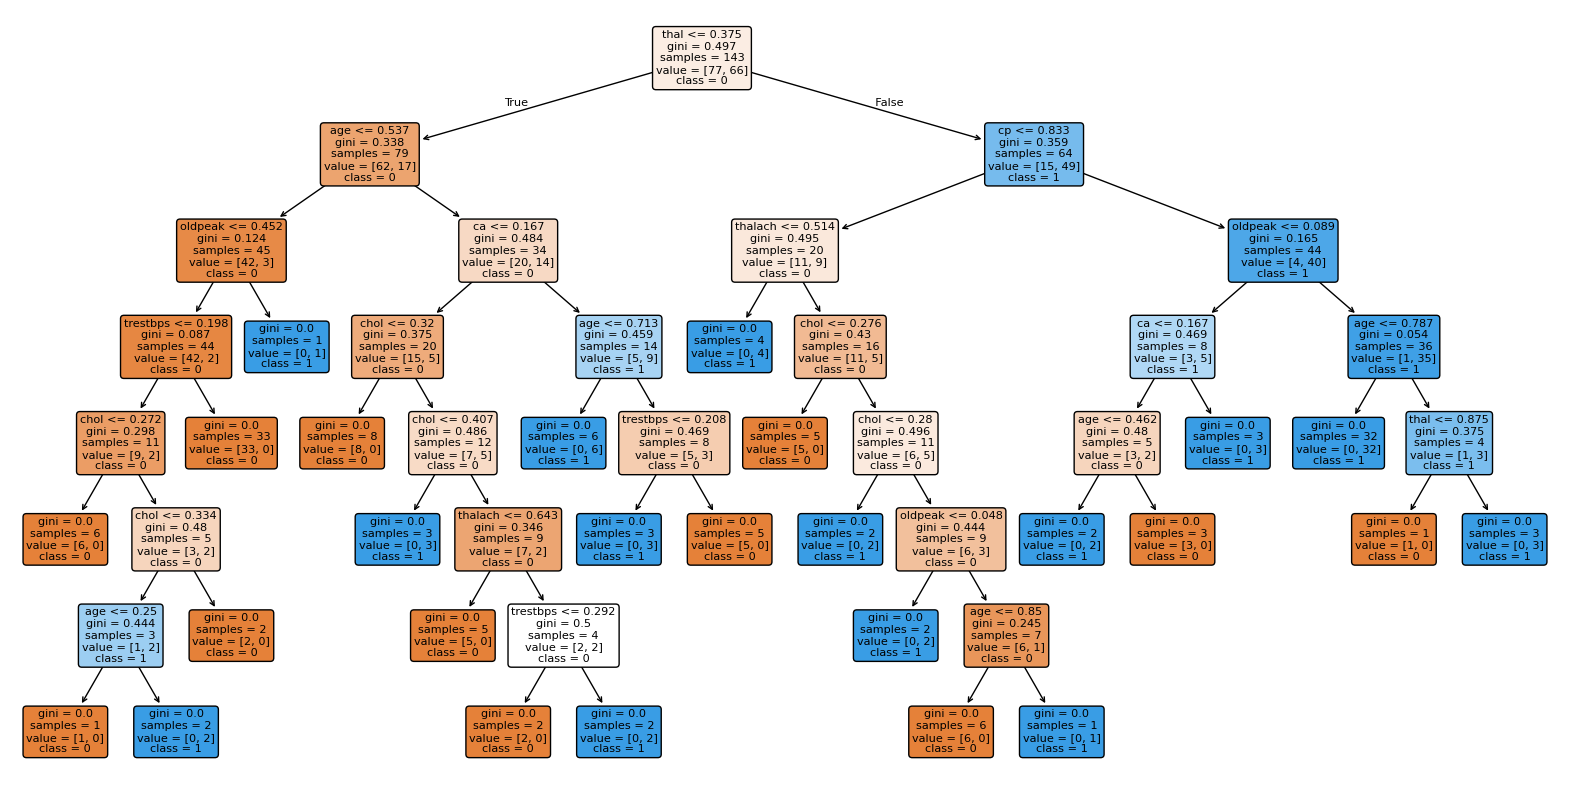

In [129]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_9, filled=True, feature_names=X.columns, class_names=['0','1'], rounded=True)
plt.show()


In [130]:
# prompt: predict decision tree on test set and get roc-auc

# Predict probabilities on the test set
y_pred_prob = model_9.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc}")


ROC AUC: 0.695046439628483


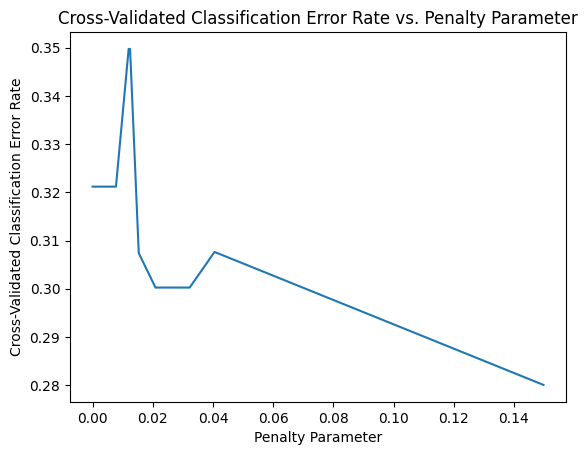

Optimal CCP Alpha: 0.14982257883304634


In [131]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score # Import accuracy_score

path = model_9.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
kfolds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
accuracies = []
for ccp_alpha in ccp_alphas:
    score_for_alpha = []
    for train_index, test_index in kfolds.split(X_train, y_train):
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        # Use integer-based indexing for NumPy arrays
        clf.fit(X_train.values[train_index], y_train[train_index]) # Changed .iloc to .values for X_train
        y_pred = clf.predict(X_train.values[test_index]) # Changed .iloc to .values for X_train
        score = accuracy_score(y_pred, y_train[test_index])
        score_for_alpha.append(score)
    accuracies.append(sum(score_for_alpha)/len(score_for_alpha))
# Produce penalty parameter vs CV classification error rate
plt.plot(ccp_alphas, 1 - np.array(accuracies))
plt.xlabel('Penalty Parameter')
plt.ylabel('Cross-Validated Classification Error Rate')
plt.title('Cross-Validated Classification Error Rate vs. Penalty Parameter')
plt.show()
# Find the penalty parameter that produces the optimal pruned tree
optimal_ccp_alpha = ccp_alphas[np.argmin(1 - np.array(accuracies))]
print(f"Optimal CCP Alpha: {optimal_ccp_alpha}")

## 10. Pruned Decision Tree


In [132]:
model_10 = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
model_10.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.14982257883304634),
                       random_state=42)

In [133]:
# prompt: get training error rate and then test error rate for model 10

# Make predictions on the training data
y_pred_train_10 = model_10.predict(X_train)

# Calculate the training error rate
training_error_rate_10 = 1 - np.mean(y_pred_train_10 == y_train)
print(f"Training Error Rate for Model 10: {training_error_rate_10}")

# Make predictions on the test data
y_pred_test_10 = model_10.predict(X_test)

# Calculate the test error rate
test_error_rate_10 = 1 - np.mean(y_pred_test_10 == y_test)
print(f"Test Error Rate for Model 10: {test_error_rate_10}")


Training Error Rate for Model 10: 0.46153846153846156
Test Error Rate for Model 10: 0.4722222222222222


In [134]:
# prompt: get roc auc for model 10

# Predict probabilities on the test set for model_10
y_pred_prob_10 = model_10.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for model_10
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, y_pred_prob_10)
roc_auc_10 = auc(fpr_10, tpr_10)

print(f"ROC AUC for Model 10: {roc_auc_10}")


ROC AUC for Model 10: 0.5


## 11. Bagging


In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model_11 = RandomForestClassifier(random_state=101, max_features=X_train.shape[1])
model_11.fit(X_train, y_train)
y_pred_proba_bagging = model_11.predict_proba(X_test)[:, 1]
roc_auc_bagging = roc_auc_score(y_test, y_pred_proba_bagging)
print("Test ROC AUC (bagging):", roc_auc_bagging)

Test ROC AUC (bagging): 0.9504643962848297


     Feature  Importance
12      thal    0.216820
2         cp    0.148832
11        ca    0.115763
7    thalach    0.114921
4       chol    0.104278
0        age    0.094683
9    oldpeak    0.075089
3   trestbps    0.068131
10     slope    0.016520
6    restecg    0.015736
8      exang    0.014448
1        sex    0.010919
5        fbs    0.003860


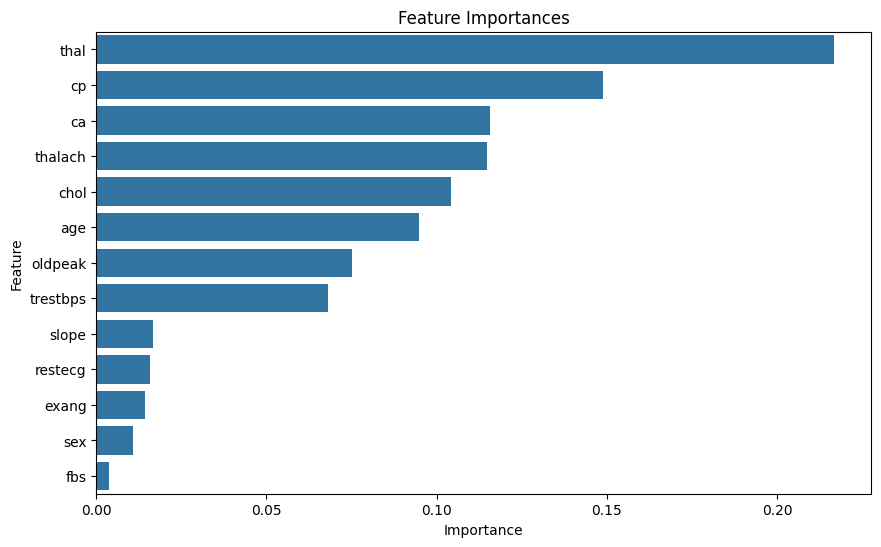

In [136]:
# Get feature importances
importances = model_11.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the results
print(feature_importance_df)

# Example visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

## 12. Random Forests

Best learning rate: {'learning_rate': 0.7}


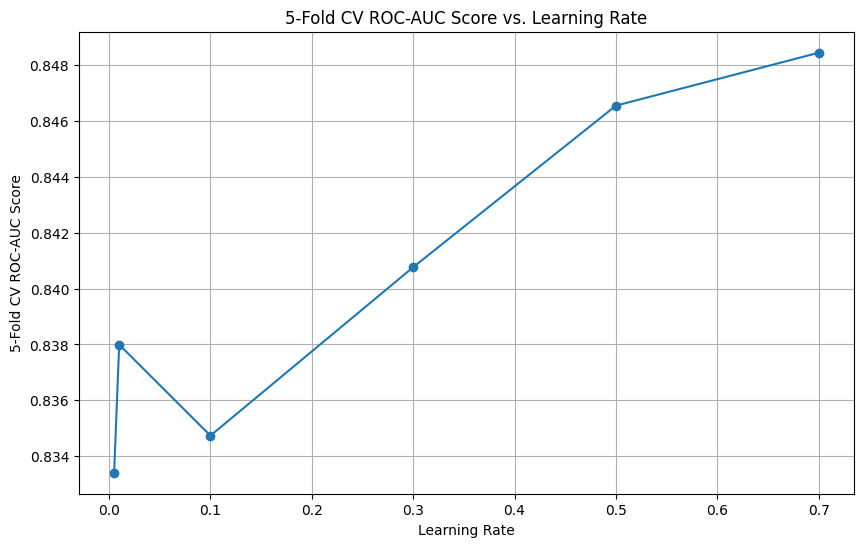

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier(n_estimators=1000, random_state=101)
param_grid = {'learning_rate': [0.005, 0.01, 0.1, 0.3, 0.5, 0.7]}
grid_search = GridSearchCV(gbc, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

model_12 = grid_search.best_estimator_
print("Best learning rate:", grid_search.best_params_)

results = grid_search.cv_results_

# Extract learning rates and their corresponding mean test scores
learning_rates = results['param_learning_rate'].data
mean_test_scores = results['mean_test_score']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, mean_test_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('5-Fold CV ROC-AUC Score')
plt.title('5-Fold CV ROC-AUC Score vs. Learning Rate')
plt.grid(True)
plt.show()

In [138]:
model_12 = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.005, random_state=101)
model_12.fit(X_train, y_train)
train_auc = roc_auc_score(y_train, model_11.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model_11.predict_proba(X_test)[:, 1])
print(f"Training ROC-AUC: {train_auc:.4f}")
print(f"Test ROC-AUC: {test_auc:.4f}")

Training ROC-AUC: 1.0000
Test ROC-AUC: 0.9505


ROC-AUC for 100 trees: Training ROC-AUC: 0.9644824872097599, Test ROC-AUC: 0.8560371517027864
ROC-AUC for 500 trees: Training ROC-AUC: 0.9929161747343566, Test ROC-AUC: 0.913312693498452
ROC-AUC for 1000 trees: Training ROC-AUC: 0.9996064541519087, Test ROC-AUC: 0.9009287925696595
ROC-AUC for 2000 trees: Training ROC-AUC: 1.0, Test ROC-AUC: 0.9009287925696595
ROC-AUC for 5000 trees: Training ROC-AUC: 1.0, Test ROC-AUC: 0.8947368421052632
ROC-AUC for 10000 trees: Training ROC-AUC: 1.0, Test ROC-AUC: 0.8854489164086689


<ipython-input-139-fce970c94c44>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


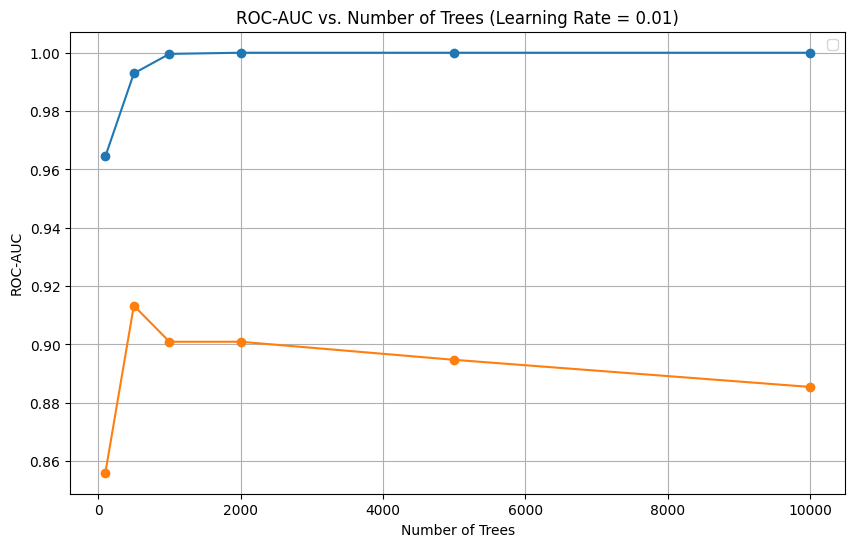

In [139]:
n_estimators_list = [100, 500, 1000, 2000, 5000, 10000]
training_ROC_AUC = []
test_ROC_AUC = []

# Iterate over different numbers of trees
for n_trees in n_estimators_list:
    gbc = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=0.005, random_state=101)
    gbc.fit(X_train, y_train)
    y_train_pred_proba = gbc.predict_proba(X_train)[:, 1]
    train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    training_ROC_AUC.append(train_roc_auc)

    test_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])
    test_ROC_AUC.append(test_auc)

    print(f"ROC-AUC for {n_trees} trees: Training ROC-AUC: {train_roc_auc}, Test ROC-AUC: {test_auc}")


# Plot training accuracy vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, training_ROC_AUC, marker='o')
plt.plot(n_estimators_list, test_ROC_AUC, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC vs. Number of Trees (Learning Rate = 0.01)')
plt.legend()
plt.grid(True)

# Model Evaluation

## ROC-Curves

In [143]:
# Model 1
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, model_1.predict(X_test))
auroc_1 = roc_auc_score(y_test, model_1.predict(X_test))

# Model 2
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, model_2.predict(X_test))
auroc_2 = roc_auc_score(y_test, model_2.predict(X_test))

# Model 3
X_test_model_3 = sm.add_constant(df_test[selected_features_forward_bic])

fpr_3, tpr_3, thresholds_3 = roc_curve(df_test['target'], model_3.predict(X_test_model_3))
auroc_3 = roc_auc_score(df_test['target'], model_3.predict(X_test_model_3))

# Model 4
X_test_model_4 = sm.add_constant(df_test[selected_features_forward_aic])

fpr_4, tpr_4, thresholds_4 = roc_curve(df_test['target'], model_4.predict(X_test_model_4))
auroc_4 = roc_auc_score(df_test['target'], model_4.predict(X_test_model_4))

# Model 6
fpr_6, tpr_6, thresholds_6 = roc_curve(y_test, model_6.predict_proba(X_test)[:, 1])
auroc_6 = roc_auc_score(y_test, model_6.predict_proba(X_test)[:, 1])

# Model 7
fpr_7, tpr_7, thresholds_7 = roc_curve(y_test, model_7.predict_proba(X_test)[:, 1])
auroc_7 = roc_auc_score(y_test, model_7.predict_proba(X_test)[:, 1])

# Model 8
fpr_8, tpr_8, thresholds_8 = roc_curve(y_test, model_8.predict_proba(X_test)[:, 1])
auroc_8 = roc_auc_score(y_test, model_8.predict_proba(X_test)[:, 1])

# Model 9
fpr_9, tpr_9, thresholds_9 = roc_curve(y_test, model_9.predict_proba(X_test)[:, 1])
auroc_9 = roc_auc_score(y_test, model_9.predict_proba(X_test)[:, 1])

# Model 10
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test, model_10.predict_proba(X_test)[:, 1])
auroc_10 = roc_auc_score(y_test, model_10.predict_proba(X_test)[:, 1])

# Model 11
fpr_11, tpr_11, thresholds_11 = roc_curve(y_test, model_11.predict_proba(X_test)[:, 1])
auroc_11 = roc_auc_score(y_test, model_11.predict_proba(X_test)[:, 1])

# Model 12
fpr_12, tpr_12, thresholds_12 = roc_curve(y_test, model_12.predict_proba(X_test)[:, 1])
auroc_12 = roc_auc_score(y_test, model_12.predict_proba(X_test)[:, 1])

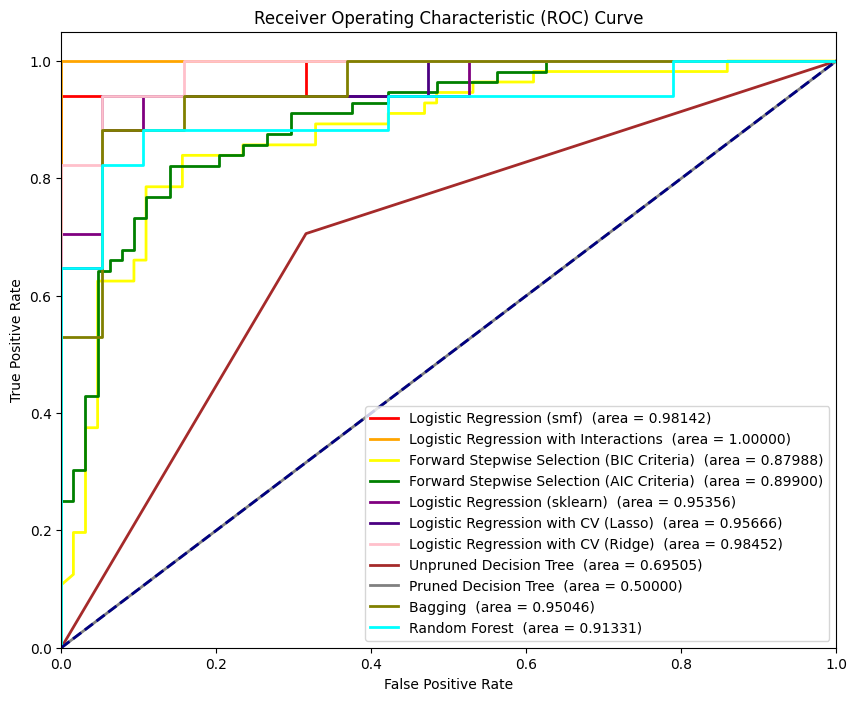

In [142]:
fontsize = 10
plt.rcParams.update({'font.size': fontsize})
plt.figure(figsize=(10, 8))

plt.plot(fpr_1, tpr_1, color='red', lw=2, label=f'Logistic Regression (smf)  (area = {auroc_1:.5f})')
plt.plot(fpr_2, tpr_2, color='orange', lw=2, label=f'Logistic Regression with Interactions  (area = {auroc_2:.5f})')
plt.plot(fpr_3, tpr_3, color='yellow', lw=2, label=f'Forward Stepwise Selection (BIC Criteria)  (area = {auroc_3:.5f})')
plt.plot(fpr_4, tpr_4, color='green', lw=2, label=f'Forward Stepwise Selection (AIC Criteria)  (area = {auroc_4:.5f})')
plt.plot(fpr_6, tpr_6, color='purple', lw=2, label=f'Logistic Regression (sklearn)  (area = {auroc_6:.5f})')
plt.plot(fpr_7, tpr_7, color='indigo', lw=2, label=f'Logistic Regression with CV (Lasso)  (area = {auroc_7:.5f})')
plt.plot(fpr_8, tpr_8, color='pink', lw=2, label=f'Logistic Regression with CV (Ridge)  (area = {auroc_8:.5f})')
plt.plot(fpr_9, tpr_9, color='brown', lw=2, label=f'Unpruned Decision Tree  (area = {auroc_9:.5f})')
plt.plot(fpr_10, tpr_10, color='gray', lw=2, label=f'Pruned Decision Tree  (area = {auroc_10:.5f})')
plt.plot(fpr_11, tpr_11, color='olive', lw=2, label=f'Bagging  (area = {auroc_11:.5f})')
plt.plot(fpr_12, tpr_12, color='cyan', lw=2, label=f'Random Forest  (area = {auroc_12:.5f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()